In [148]:
import pandas as pd

df = pd.read_csv('results/final_result.csv',names=["hack_license","pickup_datetime","dropoff_datetime","passenger_count","trip_time_in_secs","trip_distance","pu_location_id","do_location_id"])
df_astoria = df[(df.pu_location_id.isin([7])) & (df.do_location_id.isin([7])) & (df.trip_distance<10)]
print("trips within astoria: "+str(df_astoria['trip_distance'].count()))
print("miles travelled per passenger: "+str(df_astoria['trip_distance'].sum()/df_astoria['passenger_count'].sum()))
print("mean passengers per trip: "+str(df_astoria['passenger_count'].mean()))

df_astoria_to_other = df[(df.pu_location_id.isin([7]))]
print("trips originiated from astoria: "+str(df_astoria_to_other['trip_distance'].count()))
print("miles travelled per passgender: "+str(df_astoria_to_other['trip_distance'].sum()/df_astoria_to_other['passenger_count'].sum()))
print("mean passengers per trip "+str(df_astoria_to_other['passenger_count'].mean()))



df_uppereast = df[(df.pu_location_id.isin([236,237])) & (df.do_location_id.isin([236,237]))&(df.trip_distance<10)]

print("trips within uppereast: "+str(df_uppereast['trip_distance'].count()))
print("miles travelled per passgender: "+str(df_uppereast['trip_distance'].sum()/df_uppereast['passenger_count'].sum()))
print("mean passengers per trip "+str(df_uppereast['passenger_count'].mean()))

df_uppereast.trip_distance.describe() 

#filter out all trips that initiated in 138(LGA airport) or 7(Astoria)
df_license = df[df.pu_location_id.isin([138,7])]

# add a column that is just trip date, removing tim
df_license['trip_date'] = pd.to_datetime(df_license['pickup_datetime'], format='%Y-%m-%d').dt.date

# do a self join on record to find out trips that goes from LGA to Astoria and then somewhere else
# the trips are joined on tripdate, hack_license and pickup location starts from last dropoff location
# also making sure the drop off time in Astoria is earlier than the pickup time for the next trip
df_merged =df_license.merge(df_license, left_on = ['hack_license','do_location_id','trip_date'],right_on =['hack_license','pu_location_id','trip_date'])
df_astoria_do = df_merged[(df_merged.pu_location_id_x==138) & (df_merged.do_location_id_x==7)&(df_merged.dropoff_datetime_x<df_merged.pickup_datetime_y)]
df_astoria_do.count()



trips within astoria: 4946
miles travelled per passenger: 0.570343483557
mean passengers per trip: 1.65992721391
trips originiated from astoria: 33723
miles travelled per passgender: 2.13398743565
mean passengers per trip 1.69928535421
trips within uppereast: 137434
miles travelled per passgender: 0.539986826711
mean passengers per trip 1.62942212262


/Users/ying/anaconda3/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


hack_license           359
pickup_datetime_x      359
dropoff_datetime_x     359
passenger_count_x      359
trip_time_in_secs_x    359
trip_distance_x        359
pu_location_id_x       359
do_location_id_x       359
trip_date              359
pickup_datetime_y      359
dropoff_datetime_y     359
passenger_count_y      359
trip_time_in_secs_y    359
trip_distance_y        359
pu_location_id_y       359
do_location_id_y       357
dtype: int64

## we can tell from the graph below that weekdays rides peaked around morning 9am and afternoon 5pm. Also late night volume during weekends are extremely high as well. 

/Users/ying/anaconda3/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/ying/anaconda3/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/ying/anaconda3/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

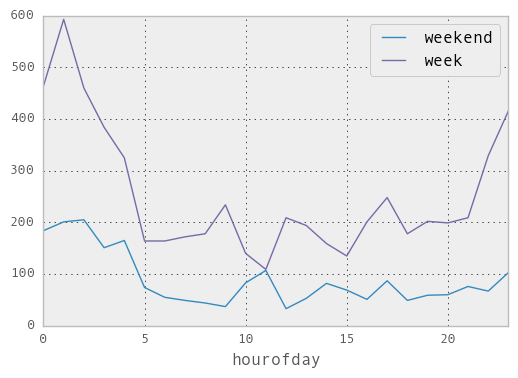

In [154]:
df_astoria['pickup_datetime'] = pd.to_datetime(df_astoria['pickup_datetime'], format='%Y-%m-%d %H:%M:%S') 

df_astoria['weekday'] = df_astoria['pickup_datetime'].apply(lambda x: x.weekday())
#pd.DatetimeIndex(df_astoria['pickup_datetime']).weekday
df_astoria['hourofday'] =  df_astoria['pickup_datetime'].apply(lambda x: x.hour)
df_astoria.groupby(['weekday', 'hourofday'])['passenger_count'].count()
plot_weekend = df_astoria[df_astoria.weekday.isin([6,0])].groupby(['hourofday'])['passenger_count'].sum()
plot_weekdays = df_astoria[~df_astoria.weekday.isin([6,0])].groupby(['hourofday'])['passenger_count'].sum()
plot_weekend.plot(x='hourofday', y='passenger_count', label='weekend',legend='true')
plot_weekdays.plot(x='hourofday', y='passenger_count', label='week',legend='true')


